# 项目：整理Netflix电影演员评分数据

## 分析目标

此数据分析的目的是，整理不同流派影视作品，比如喜剧片、动作片、科幻片中，各演员出演作品的平均IMDB评分，从而挖掘出各个流派中的高评分作品演员。

本实战项目的目的在于练习整理数据，从而得到可供下一步分析的数据。

## 简介

原始数据集记录了截止至2022年7月美国地区可观看的所有Netflix电视剧及电影数据。数据集包含两个数据表：`titles.csv`和`credits.csv`。

`titles.csv`包含电影及电视剧相关信息，包括影视作品ID、标题、类型、描述、流派、IMDB（一个国外的在线评分网站）评分，等等。`credits.csv`包含超过7万名出现在Netflix影视作品的导演及演员信息，包括名字、影视作品ID、人物名、演职员类型（导演/演员）等。

`titles.csv`每列的含义如下：
- id：影视作品ID。
- title：影视作品标题。
- show_type：作品类型，电视节目或电影。
- description：简短描述。
- release_year：发布年份。
- age_certification：适龄认证。
- runtime：每集电视剧或电影的长度。
- genres：流派类型列表。
- production_countries：出品国家列表。
- seasons：如果是电视剧，则是季数。
- imdb_id：IMDB的ID。
- imdb_score：IMDB的评分。
- imdb_votes：IMDB的投票数。
- tmdb_popularity：TMDB的流行度。
- tmdb_score：TMDB的评分。

`credits.csv`每列的含义如下：
- person_ID：演职员ID。
- id：参与的影视作品ID。
- name：姓名。
- character_name：角色姓名。
- role：演职员类型，演员或导演。

In [1]:
import pandas as pd

In [4]:
original_credits = pd.read_csv(r"f:\jupyter_files\Netflix数据整理\credits.csv")
original_titles = pd.read_csv(r"f:\jupyter_files\Netflix数据整理\titles.csv")

## 评估和清理数据

### 数据整齐度

In [5]:
original_credits.head(10)


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [6]:
original_titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [7]:
cleaned_titles = original_titles.copy()
cleaned_credits = original_credits.copy()

In [8]:
cleaned_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [9]:
cleaned_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [10]:
cleaned_titles["genres"][1]

"['drama', 'crime']"

字符串，先转化成列表，再做列表拆分

In [12]:
cleaned_titles["genres"] = cleaned_titles["genres"].apply(lambda x: eval(x))

In [14]:
cleaned_titles["genres"][1]

['drama', 'crime']

成功转化成列表，现在开始拆分

In [16]:
cleaned_titles = cleaned_titles.explode("genres")

In [50]:
cleaned_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,thriller,US,NaN,tt0068473,7.7,107673.0,10.010,7.300


拆分完成，现在做production_countries的列表拆分

In [19]:
cleaned_titles["production_countries"][1]

1    ['US']
1    ['US']
Name: production_countries, dtype: object

直接就是列表，不用做字符串转列表，直接拆

In [47]:
cleaned_titles["production_countries"] = cleaned_titles["production_countries"].apply(lambda x: eval(x))
cleaned_titles = cleaned_titles.explode("production_countries")

In [49]:
cleaned_titles["production_countries"].head()
cleaned_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,thriller,US,NaN,tt0068473,7.7,107673.0,10.010,7.300


### 数据干净度

接下来通过info，对数据内容进行大致了解。

In [22]:
cleaned_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15147 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15147 non-null  object 
 1   title                 15146 non-null  object 
 2   type                  15147 non-null  object 
 3   description           15125 non-null  object 
 4   release_year          15147 non-null  int64  
 5   age_certification     9298 non-null   object 
 6   runtime               15147 non-null  int64  
 7   genres                15088 non-null  object 
 8   production_countries  15147 non-null  object 
 9   seasons               5923 non-null   float64
 10  imdb_id               14525 non-null  object 
 11  imdb_score            14399 non-null  float64
 12  imdb_votes            14375 non-null  float64
 13  tmdb_popularity       14995 non-null  float64
 14  tmdb_score            14614 non-null  float64
dtypes: float64(5), int64(2), 

In [23]:
cleaned_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [24]:
cleaned_titles["release_year"] = pd.to_datetime(cleaned_titles["release_year"], format='%Y')
cleaned_titles["release_year"]

0      1945-01-01
1      1976-01-01
1      1976-01-01
2      1972-01-01
2      1972-01-01
          ...    
5847   2021-01-01
5848   2021-01-01
5849   2021-01-01
5849   2021-01-01
5849   2021-01-01
Name: release_year, Length: 15147, dtype: datetime64[ns]

从输出结果来看，cleaned_titles数据共有17818条观察值，title、description、age_certification、genres、production_countries、seasons、imdb_id、imdb_score、tmdb_popularity、tmdb_score、imdb_votes、tmdb_popularity、tmdb_score变量均存在缺失值，将在后续进行评估和清理。

此外，release_year表示年份，数据类型不应为数字，应为日期，所以需要进行数据格式转换。

In [25]:
cleaned_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


从输出结果来看，cleaned_credits数据共有77801条观察值，其中character变量存在缺失值，将在后续进行评估和清理。

此外，person_id表示演职员ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。

In [26]:
cleaned_credits["person_id"] = cleaned_credits["person_id"].astype(str)
cleaned_credits["person_id"]

0           3748
1          14658
2           7064
3           3739
4          48933
          ...   
77796     736339
77797     399499
77798     373198
77799     378132
77800    1950416
Name: person_id, Length: 77801, dtype: object

### 处理缺失数据

在cleaned_titles中，title、description、age_certification、genres、production_countries、seasons、imdb_id、imdb_score、tmdb_popularity、tmdb_score、imdb_votes、tmdb_popularity、tmdb_score变量存在缺失值。

由于影视作品的标题、描述、适龄认证、发行国家、电视剧季数、IMDB的ID、TMDB的流行度、TMDB的评分，并不影响我们挖掘各个流派中的高IMDB评分作品演员，所以可以保留title、description、age_certification、production_countries、seasons、imdb_id、tmdb_popularity、tmdb_score、imdb_votes、tmdb_popularity、tmdb_score变量值存在空缺的观察值。

但imdb_score和genres，即IMDB评分和流派，和我们后续要做的分析息息相关。

先提取出imdb_score缺失观察值进行查看。

In [28]:
cleaned_titles[cleaned_titles["imdb_score"].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945-01-01,TV-MA,51,documentation,['US'],1.0,NaN,NaN,NaN,0.600,NaN
75,tm132164,Bill Hicks: Sane Man,MOVIE,Sane Man was filmed before Bill recorded ‘Dang...,1989-01-01,R,80,comedy,['US'],NaN,NaN,NaN,NaN,3.377,7.5
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991-01-01,TV-G,18,documentation,['JP'],12.0,NaN,NaN,NaN,7.730,7.8
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991-01-01,TV-G,18,family,['JP'],12.0,NaN,NaN,NaN,7.730,7.8
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991-01-01,TV-G,18,reality,['JP'],12.0,NaN,NaN,NaN,7.730,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,tm1225897,Social Man,MOVIE,Two competitive social media Influencers go he...,2021-01-01,NaN,96,drama,[],NaN,tt20198164,NaN,NaN,NaN,NaN
5833,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021-01-01,TV-14,24,comedy,['NG'],1.0,NaN,NaN,NaN,0.840,NaN
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022-01-01,NaN,26,NaN,[],NaN,NaN,NaN,NaN,1.179,7.0
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021-01-01,NaN,35,NaN,['US'],NaN,NaN,NaN,NaN,NaN,NaN


删除imdb_score缺省的那些行

In [29]:
cleaned_titles = cleaned_titles.dropna(subset = "imdb_score")
cleaned_titles["imdb_score"].isnull().sum()

0

没有缺失imdbscore的行了，查看genre的缺失情况

In [32]:
cleaned_titles.query("genres.isnull()")

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1813,ts77824,My Next Guest Needs No Introduction With David...,SHOW,TV legend David Letterman teams up with fascin...,2018-01-01,TV-MA,50,NaN,['US'],4.0,tt7829834,7.8,5581.0,8.217,7.6
1939,ts215037,Minecraft: Story Mode,SHOW,"MInecraft: Story Mode is an interactive, anima...",2018-01-01,TV-PG,52,NaN,['US'],1.0,tt10498322,5.6,347.0,NaN,NaN
2386,ts74805,A Little Help with Carol Burnett,SHOW,In this unscripted series starring comedy lege...,2018-01-01,TV-G,24,NaN,['US'],1.0,tt7204366,6.3,237.0,1.621,6.2
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018-01-01,TV-PG,68,NaN,[],1.0,tt12635254,9.6,7.0,NaN,NaN
4274,tm1172010,The Lockdown Plan,MOVIE,NaN,2020-01-01,NaN,49,NaN,[],NaN,tt13079112,6.5,NaN,NaN,NaN
4648,tm1113921,In Vitro,MOVIE,'In Vitro' is an otherworldly rumination on me...,2019-01-01,NaN,27,NaN,[],NaN,tt10545994,7.7,NaN,NaN,NaN


In [33]:
cleaned_titles = cleaned_titles.dropna(subset = "genres",axis = 0)
cleaned_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,crime,['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,drama,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,action,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,thriller,['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021-01-01,NaN,134,drama,[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021-01-01,NaN,7,family,[],1.0,tt13711094,7.8,18.0,2.289,10.000
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021-01-01,NaN,7,animation,[],1.0,tt13711094,7.8,18.0,2.289,10.000


查看是否删除干净

In [34]:
cleaned_titles["genres"].isnull().sum()

0

接下来评估cleaned_credits的缺失数据，其中只有character变量存在缺失值。

角色名并不影响我们挖掘各个流派中的高IMDB评分作品演员，并且此变量缺失也有可能因为演职员类别是导演，没有对应角色，因此可以保留character变量值存在空缺的观察值。

### 处理重复数据

In [36]:
cleaned_titles.duplicated().sum()

0

In [37]:
cleaned_credits.duplicated().sum()

0

无重复数据

### 处理不一致数据

In [39]:
cleaned_titles['genres'].value_counts()

genres
drama            2827
comedy           2218
thriller         1180
action           1109
romance           955
crime             909
documentation     859
family            652
animation         630
fantasy           619
scifi             560
european          428
horror            366
history           254
music             244
reality           219
sport             170
war               155
western            39
Name: count, dtype: int64

无不一致数据

In [52]:
cleaned_titles['production_countries'].value_counts()

production_countries
US    5648
IN    1610
GB    1068
JP    1046
FR     720
      ... 
GT       1
CU       1
LK       1
NP       1
FO       1
Name: count, Length: 108, dtype: int64

由于value_counts执行结果中有太多值，Pandas只会默认显示开头和结尾的一些值。要完整展示结果，可以把display.max_rows设置为None，即取消展示行数上限。

pd.option_context在with的作用域内，临时修改dataframe的参数，而set_option方法是全局性的，想要改回来，需要调用reset_option()方法。常见的参数二者通用  
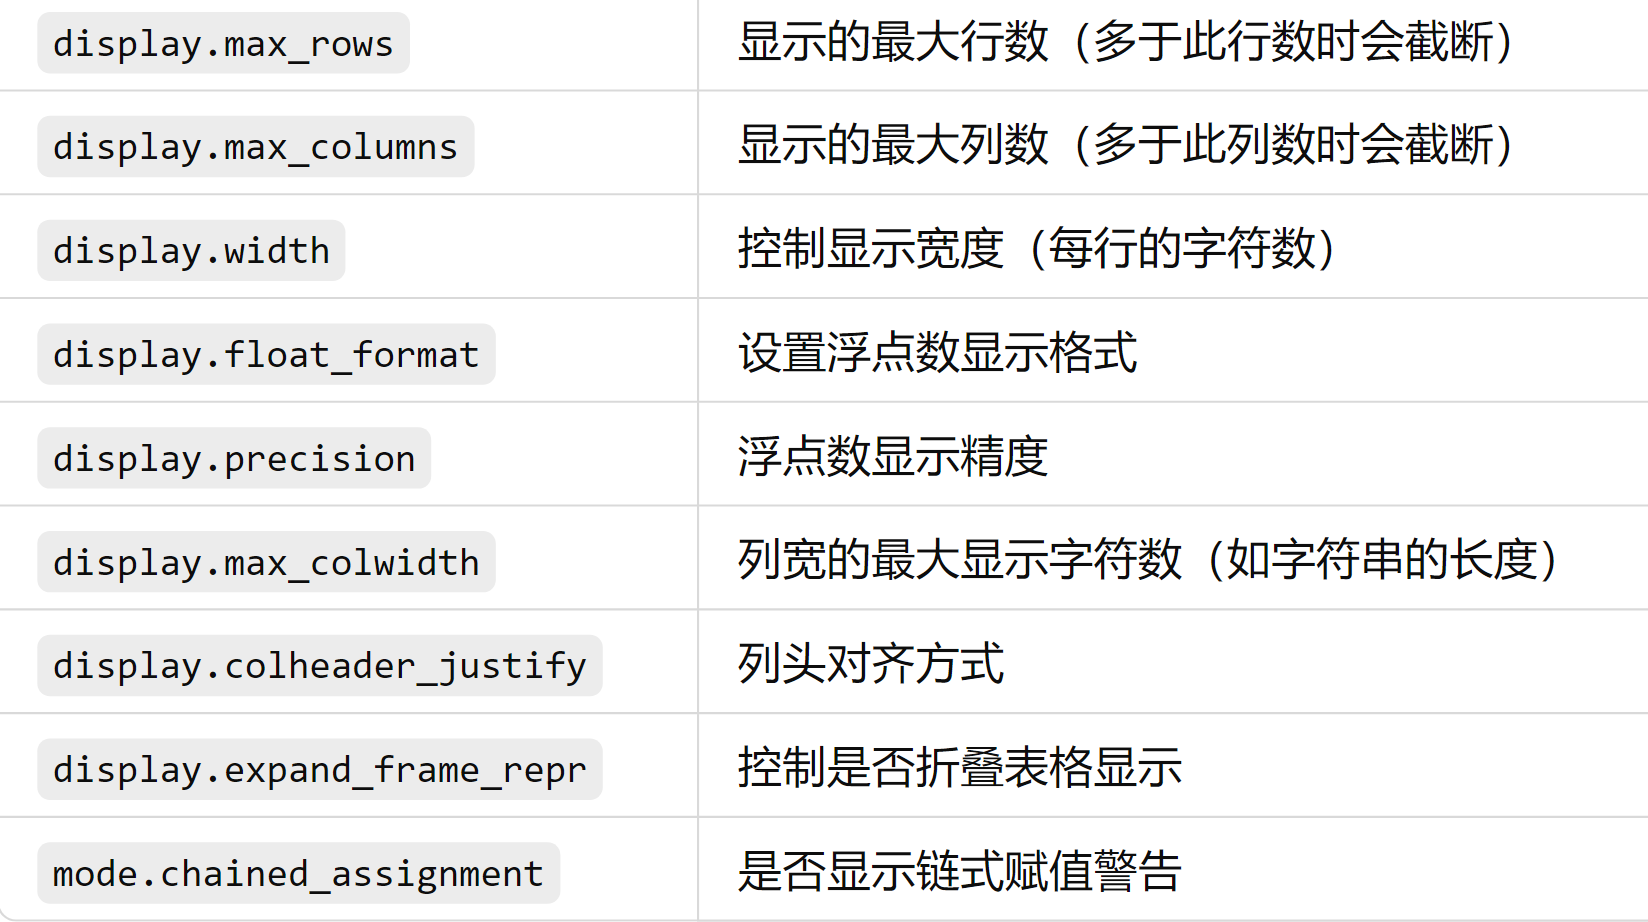

In [55]:
with pd.option_context("display.max_rows",None):
    print(cleaned_titles["production_countries"].value_counts())

production_countries
US         5648
IN         1610
GB         1068
JP         1046
FR          720
KR          637
ES          637
CA          608
DE          383
CN          295
MX          264
IT          224
BR          221
AU          217
TR          195
PH          192
AR          150
ID          149
BE          148
TW          133
NG          131
PL          126
ZA          103
NL          102
HK          102
CO           94
EG           93
DK           89
TH           87
SE           81
LB           70
NO           68
AE           52
IE           49
SG           47
XX           43
IL           42
RU           41
CL           35
CH           33
PS           32
BG           31
MY           30
SA           28
AT           28
IS           28
LU           27
NZ           27
PE           26
RO           25
QA           24
CZ           22
JO           19
FI           18
HU           18
UY           15
MA           15
PT           14
KH           10
KW           10
PR            9
PK 

把Lebanon改成LB

In [56]:
cleaned_titles["production_countries"] = cleaned_titles["production_countries"].replace("Lebanon","LB")
cleaned_titles["production_countries"]

1        US
1        US
2        US
2        US
2        US
       ... 
5846    NaN
5847     CO
5849    NaN
5849    NaN
5849    NaN
Name: production_countries, Length: 16970, dtype: object

In [58]:
with pd.option_context("display.max_rows",None):
    print(cleaned_titles["production_countries"].value_counts())

production_countries
US    5648
IN    1610
GB    1068
JP    1046
FR     720
KR     637
ES     637
CA     608
DE     383
CN     295
MX     264
IT     224
BR     221
AU     217
TR     195
PH     192
AR     150
ID     149
BE     148
TW     133
NG     131
PL     126
ZA     103
HK     102
NL     102
CO      94
EG      93
DK      89
TH      87
SE      81
LB      71
NO      68
AE      52
IE      49
SG      47
XX      43
IL      42
RU      41
CL      35
CH      33
PS      32
BG      31
MY      30
AT      28
SA      28
IS      28
LU      27
NZ      27
PE      26
RO      25
QA      24
CZ      22
JO      19
FI      18
HU      18
UY      15
MA      15
PT      14
KW      10
KH      10
PK       9
PR       9
UA       8
MT       8
VN       8
LT       7
IR       7
CD       7
SU       7
TN       7
SN       6
AL       6
KE       6
GH       6
IQ       5
MU       5
CY       5
KN       4
GR       4
IO       4
SY       4
TZ       4
MC       4
GL       3
CM       3
AO       3
BS       3
HR       3
BD       3


替换完成

针对cleaned_credits，不一致数据可能存在于role中，我们将查看是否存在多个不同值指代同一演职员类型的情况。

In [60]:
cleaned_credits["role"].value_counts()

role
ACTOR       73251
DIRECTOR     4550
Name: count, dtype: int64

无重复指代

role只有两种类型，转化成category

In [62]:
cleaned_credits["role"] = cleaned_credits["role"].astype("category")


### 处理无效或错误数据

In [63]:
original_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


无异常数据

从以上统计信息来看，original_titles里不存在脱离现实意义的数值。

original_credits由于不包含表示数值含义的变量，因此无需用describe检查。

## 整理数据

In [64]:
cleaned_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,action,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972-01-01,R,109,thriller,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021-01-01,NaN,134,drama,NaN,NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021-01-01,NaN,7,family,NaN,1.0,tt13711094,7.8,18.0,2.289,10.000
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021-01-01,NaN,7,animation,NaN,1.0,tt13711094,7.8,18.0,2.289,10.000


In [65]:
cleaned_credits

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR
77798,373198,tm1059008,Inés Prieto,Fanny,ACTOR
77799,378132,tm1059008,Isabel Gaona,Cacica,ACTOR


根据id属性合并

In [67]:
credits_with_titles = pd.merge(cleaned_titles,cleaned_credits,on = "id")
credits_with_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276104,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,María Paz,ACTOR
276105,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,Karen Bayona,ACTOR
276106,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,Fanny,ACTOR
276107,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021-01-01,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,Cacica,ACTOR


要得到不同流派genre中，演员的imdb得分，从而挖掘出不同演员适合的流派

先把只包含演员，不包含导演的子表拿出来

In [74]:
actors_with_titles = credits_with_titles.query("role == 'ACTOR'")

In [75]:
actors_with_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976-01-01,R,114,drama,US,NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR


In [76]:
groupby_genres_and_person_id = actors_with_titles.groupby(["genres","person_id"])

In [78]:
imdb_score_groupby_genres_and_person_id = groupby_genres_and_person_id["imdb_score"].mean()
imdb_score_groupby_genres_and_person_id

genres   person_id
action   1000         6.866667
         100007       7.000000
         100013       6.400000
         100019       6.500000
         100020       6.500000
                        ...   
western  993735       6.500000
         998673       7.300000
         998674       7.300000
         998675       7.300000
         99940        4.000000
Name: imdb_score, Length: 168881, dtype: float64

得到了不同演员不同题材genre的imdb平均得分。使用reset_index得到更加规整的dataframe

In [79]:
imdb_score_groupby_genres_and_person_id = imdb_score_groupby_genres_and_person_id.reset_index()
imdb_score_groupby_genres_and_person_id

,genres,person_id,imdb_score
0,action,1000,6.866667
1,action,100007,7.000000
2,action,100013,6.400000
3,action,100019,6.500000
4,action,100020,6.500000
...,...,...,...
168876,western,993735,6.500000
168877,western,998673,7.300000
168878,western,998674,7.300000
168879,western,998675,7.300000


下面是找到imdb_score_groupby_genres_and_person_id表里面最高的imdbscore的演员

In [86]:
genres_max_scores = imdb_score_groupby_genres_and_person_id.groupby(["genres"])["imdb_score"].max()
genres_max_scores

genres
action           9.3
animation        9.3
comedy           9.2
crime            9.5
documentation    9.1
drama            9.5
european         8.9
family           9.3
fantasy          9.3
history          9.1
horror           9.0
music            8.8
reality          8.9
romance          9.2
scifi            9.3
sport            9.1
thriller         9.5
war              8.8
western          8.9
Name: imdb_score, dtype: float64

但是现在还不知道对应的演员id，拼接两张表即可

In [87]:
genres_max_score_with_person_id = pd.merge(genres_max_scores,imdb_score_groupby_genres_and_person_id,on = ["genres","imdb_score"])
genres_max_score_with_person_id

,genres,imdb_score,person_id
0,action,9.3,12790
1,action,9.3,1303
2,action,9.3,21033
3,action,9.3,336830
4,action,9.3,86591
...,...,...,...
131,war,8.8,826547
132,western,8.9,22311
133,western,8.9,28166
134,western,8.9,28180


这个genres_max_scores里面的imdb_score是最高得分，前面的imdb_score_groupby_genres_and_person_id的imdb_score是所有演员所有题材所有得分，所以默认的inner方法肯定能得到一个包含所有person_id及其对应的最高imdb_score的dataframe。现在想要查询某个演员的最高得分对应的题材，就转化成为通过演员id找到最高imdb_score的问题

比如要看编号86591的演员的最高imdb_score，就可以提取genres_max_score_with_person_id的一行

In [89]:
genres_max_score_with_person_id.query("person_id == '86591'")

,genres,imdb_score,person_id
4,action,9.3,86591
9,animation,9.3,86591
40,family,9.3,86591
45,fantasy,9.3,86591
120,scifi,9.3,86591


可以知道，这五种题材这个演员都擅长，也可以把genres_max_score_with_person_id更新成有演员名字的dataframe

In [90]:
actor_id_with_names = cleaned_credits[['person_id', 'name']].drop_duplicates()
actor_id_with_names.head()

,person_id,name
0,3748,Robert De Niro
1,14658,Jodie Foster
2,7064,Albert Brooks
3,3739,Harvey Keitel
4,48933,Cybill Shepherd


In [91]:
genres_max_score_with_actor_name = pd.merge(actor_id_with_names,genres_max_score_with_person_id,on = "person_id")
genres_max_score_with_actor_name

,person_id,name,genres,imdb_score
0,22311,Koichi Yamadera,western,8.9
1,1652,Lukas Haas,music,8.8
2,1641,Leonardo DiCaprio,music,8.8
3,28180,Unsho Ishizuka,western,8.9
4,28166,Megumi Hayashibara,western,8.9
...,...,...,...,...
131,439923,Steve Kerr,history,9.1
132,439923,Steve Kerr,sport,9.1
133,408553,Phil Jackson,documentation,9.1
134,408553,Phil Jackson,history,9.1


最后是把genres进行排序，方便查看。可以使用numpy的sort方法，也可以使用dataframe的sort_values()方法。

In [95]:
import numpy as np
genres_max_score_with_actor_name["genres"] = np.sort(genres_max_score_with_actor_name["genres"])
genres_max_score_with_actor_name["genres"]

0       action
1       action
2       action
3       action
4       action
        ...   
131        war
132    western
133    western
134    western
135    western
Name: genres, Length: 136, dtype: object

In [96]:
genres_max_score_with_actor_name

,person_id,name,genres,imdb_score
0,22311,Koichi Yamadera,action,8.9
1,1652,Lukas Haas,action,8.8
2,1641,Leonardo DiCaprio,action,8.8
3,28180,Unsho Ishizuka,action,8.9
4,28166,Megumi Hayashibara,action,8.9
...,...,...,...,...
131,439923,Steve Kerr,war,9.1
132,439923,Steve Kerr,western,9.1
133,408553,Phil Jackson,western,9.1
134,408553,Phil Jackson,western,9.1
